In [1]:
# importy, przydatne funkcje

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

# np.vander(x, degree + 1)
# przyjmuje listę liczb x
# zwraca tabelę po zmianie zmiennych na wielomian stopnia x
# można sobie przetestować dla lepszego zrozumienia

def f(size):
    '''
    zwraca dwie listy przykładowych danych (x i y) o długości 'size'
    w tym wypadku przykładowa prawdziwa funkcja to y(x) = 2 * sin(1.5 * x)
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    zwraca dwie listy przykładowych danych (x i y) o długości 'size'
    podobnie jak f, ale z dodanym szumem
    uwaga - współrzędna x jest "losowana" z rozkładu jednostajnego
    (dla naszych zastosowań nie robi to większej różnicy, ale porządni informatycy
    mogą chcieć zastąpić linspace przez prawdziwe losowanie)
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + np.random.randn(x.size)
    return (x,y)

def fit_polynomial(x, y, degree):
    '''
    zwraca nauczony model regresji z wielomianową zmianą zmiennych
    (x,y): dane treningowe
    degree: stopień wielomianu
    '''
    # To juz umiemy sami zaimplementować!
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    zwraca predykcję nauczonego modelu regresji z wielomianową zmianą zmiennych
    x: dane do predykcji
    '''
    degree = model.coef_.size - 1 # wyciągamy stopień wielomianu z modelu
    y = model.predict(np.vander(x, degree + 1))
    return y

f_x, f_y = f(50) # tym narysujemy sinusa

## Ćwiczenie 1 [2 pkt]

W idealnym świecie mielibyśmy dostęp do procesu generowania danych i moglibyśmy znaleźć optymalny model (a przynajmniej wybrać stopień wielomianu w regresji liniowej) oraz oszacować jego bias i variance.

1. Napisz kod, który dla ustalonego stopnia wielomianu ($K$) liczy bias, variance oraz MSE tego modelu (wielkości te estymujemy podobnie jak w ćwiczeniu 0.).

2. Dla jakich wartości $K$ można powiedzieć że mamy model "High variance/low bias"?

3. Jaka wartość $K$ daje minimum błędu MSE?

Jeśli macie Państwo problem z wymyśleniem wzoru na powyższe wielkości, proszę jeszcze raz przeczytać ze zrozumieniem sekcję o rozkładzie błędu. Kluczowe jest to, że bias liczymy średnio po różnych zestawach danych $D$ - czym są w tym wypadku dane $D$? Jak zrobić kilkadziesiąt/set różnych takich zestawów? Czy rozmiar danych $D$ może ulegać zmianie? (jeśli nie, to proszę ustawić go np. na 43 lub inną liczbę tego rzędu).

Oczekiwany wynik (z dokładnością do wartości) - poziomo $K$, pionowo bias/variance/MSE: 

<img src="figures/L5/L5_1_wynik.png">

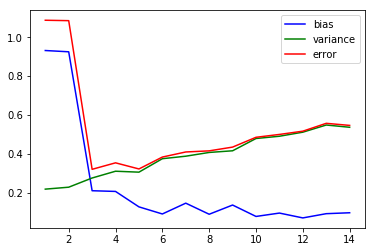

In [2]:
N = 40
S = 30

smse = []
svar = []
sbias = []

for k in range(0, 15):
    y = np.empty((N,S))
    y_pred = np.empty((N,S))
    
    for i in range(N):
        x, y[i] = sample(S)
        model = fit_polynomial(x, y[i], k)
        y_pred[i] = apply_polynomial(model, x)
    
    var = abs(y_pred - np.mean(y_pred,0)).mean()
    bias = abs(np.mean(y_pred,0) - np.mean(y,0)).sum() / S
    
    svar.append(var)
    sbias.append(bias)
    smse.append(bias**2 + var)

plt.plot(range(1, 15),sbias[1:], label = 'bias', color = 'blue')
plt.plot(range(1, 15),svar[1:], label = 'variance', color = 'green')
plt.plot(range(1, 15),smse[1:], label = 'error', color = 'red')
plt.legend()
plt.show()


## Cwiczenie 2 [1 pkt]

Im więcej podziałów w Cross Validation tym mniejczy czy większy variance **estymatora**? A jak zmienia się jego bias? Odpowiedź uzasadnij.

Lower K is cheaper, less variance, more bias, while higher K is more expensive, more variance, and lower bias. 

Choose a value (k) too small, and you will drift towards the extremity of using the Validation Set Approach(biased testing). Choose a value too large, and it will be too much of variance in the testing procedure, and computationally intensive. Usually, a value between 5-10 is used in practical Machine Learning scenarios.
https://codesachin.wordpress.com/2015/08/30/cross-validation-and-the-bias-variance-tradeoff-for-dummies/

## Cwiczenie 3 [1 pkt]

Pokaż, że logposterior ($log p(\theta | X, y)$) dla regresji liniowej ma taką postać jak $C(M)$.

$ln P(\theta |X, y) = \sum_{i} ln(p(y_i|x_i,\theta )) - ln(p(\theta )) + ln(p(y|X)) = \sum_{n=1}^N -\frac{1}{\sigma^2}(y_n-w_{n} x_n)^2 - \lambda w_{2}^2 = \sum_{n=1}^N -(y_n-f(\mathbf{x_i}))^2 - \lambda w_{2}^2 = \sum_i ( f(\mathbf{x_i}) - y_i)^2 + \lambda ||\mathbf{w}||_2^2 = C(M)$